In [1]:
import numpy as np
import matplotlib.pyplot as plt

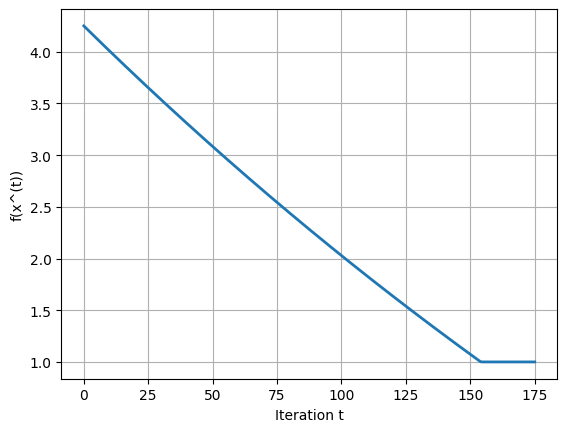

In [2]:
f  = lambda x: (x[0]-2)**2 + (x[1]-2)**2 - x[0]*x[1]
grad  = lambda x: np.array([2*x[0]-4-x[1], 2*x[1]-4-x[0]])
proj = lambda y: np.clip(y, 0.0, 1.0)

mu, T = 0.001, 175
x = np.array([0.5, 0.5], float)

fs = [f(x)]
for _ in range(T):
    x = proj(x - mu*grad(x))
    fs.append(f(x))

plt.plot(range(len(fs)), fs, linewidth=2)
plt.xlabel("Iteration t")
plt.ylabel("f(x^(t))")
plt.grid(True)
plt.show()

In [3]:
def grad_f(x):
    x1, x2 = x
    df_dx1 = -400*x1*(x2 - x1**2) - 2*(1 - x1)
    df_dx2 =  400*(x2 - x1**2)
    return np.array([df_dx1, df_dx2], dtype=float)

def hess_f(x):
    x1, x2 = x
    f_xx = 1200*x1**2 - 400*x2 + 2
    f_xy = -400*x1
    f_yy = 400
    return np.array([[f_xx, f_xy],
                     [f_xy, f_yy]], dtype=float)

In [4]:
def newton_method(x0, T=100, tolerance=1e-8):
    x = x0.astype(float)
    xs = [x.copy()]
    for t in range(T):
        g = grad_f(x)
        H = hess_f(x)
        if np.linalg.norm(g) < tolerance:
            break
        p = np.linalg.solve(H, g)
        x = x - p
        xs.append(x.copy())
    return np.array(xs)

In [5]:
def gd_fixed(x0, mu=1e-3, T=10_000, tolerance=1e-8):
    x = x0.astype(float)
    xs = [x.copy()]
    for t in range(T):
        g = grad_f(x)
        if np.linalg.norm(g) < tolerance:
            break
        x = x - mu * g
        xs.append(x.copy())
    return np.array(xs)

In [6]:
def backtracking(x0, beta=0.5, gamma=1e-4, T=10_000, tolerance=1e-8):
    x = x0.astype(float)
    xs = [x.copy()]
    for t in range(T):
        g = grad_f(x)
        g_norm_sq = np.dot(g, g)
        if np.sqrt(g_norm_sq) < tolerance:
            break

        step = 1.0
        fx = f(x)
        while f(x - step * g) > fx - gamma * step * g_norm_sq:
            step *= beta

        x = x - step * g
        xs.append(x.copy())
    return np.array(xs)

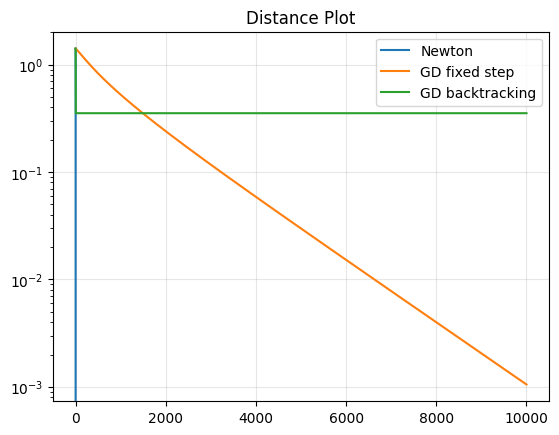

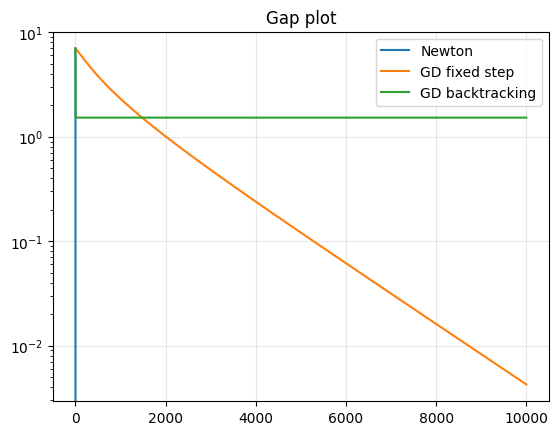

In [11]:
x0 = np.array([0.0, 0.0])
x_star = np.array([1.0, 1.0])

xs_newton = newton_method(x0)
xs_fix = gd_fixed(x0)
xs_bt  = backtracking(x0)

def dist(xs):
    return np.linalg.norm(xs - x_star, axis=1)

def gap(xs):
    return np.array([f(x) for x in xs]) - f(x_star)

plt.semilogy(dist(xs_newton), label='Newton')
plt.semilogy(dist(xs_fix), label='GD fixed step')
plt.semilogy(dist(xs_bt),  label='GD backtracking')
plt.title("Distance Plot")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.semilogy(gap(xs_newton), label='Newton')
plt.semilogy(gap(xs_fix), label='GD fixed step')
plt.semilogy(gap(xs_bt),  label='GD backtracking')
plt.title("Gap plot")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()